In [28]:
import matplotlib.pyplot as plt

In [25]:
import pandas as pd
from datetime import datetime

# Time series / date functionality in Pandas
* Pandas was developed for financial modelling (Wes Mckinney, AQR Capital)
* Time series analysis therefore comprises an integral part of the package
* We're going to look at three different concepts in Pandas
    - 1) Timestamps
    - 2) Timedeltas
    - 3) Periods

## 1) Timestamp objects
* Pandas has inbuilt TimeStamp objects
* An array of TimeStamp objects are a DateTimeIndex
* The datatype of a TimeStamp object is datetime64
* There are two main methods of creating Timestamps or a DateTimeIndex:
    - 1) `pd.to_datetime()`
    - 2) `pd.date_range()`

#### `pd.to_datetime()`

- You can use a lot of different formats to convert a string into a Timestamp

In [ ]:
pd.to_datetime('2019 july 23') 

In [ ]:
pd.to_datetime('2019-07-23')

In [ ]:
pd.to_datetime('2019.07.23')

In [ ]:
type(pd.to_datetime('230719-00:10:00'))

In [ ]:
pd.to_datetime('230719-00:10:00')

In [ ]:
pd.to_datetime('19/07/2023')

In [ ]:
pd.to_datetime('19/07/2023', utc=True).tz_convert('US/Eastern')

In [ ]:
dates = ['19/07/2023', '20/07/2023']
dates = pd.to_datetime(dates)
dates

You could also pass a pd.Series or a pd.DataFrame into `pd.to_datetime()` if the values are convertable to a Timestamp.

#### `pd.date_range()`

What happens if you want to create a range of dates?
You can use `pd.date_range()` to create a DateTimeIndex (array of Timestamps):

In [ ]:
date_range = pd.date_range('jan 1 2019', '31 dec 2019', freq = '12h')

In [ ]:
date_range

#### This is all nice and fine, but why do we care?

The reason we care for Timestamps in pandas is because they allow us to perform time related actions on the data.
Several things you can do with a timestamp:

- extract the hour
- extract the day
- extract the month
- extract the year
- Slice a DataFrame or Series if the DateTimeIndex is the Index of the DataFrame
- calculate time differences

In [ ]:
first_day = date_range[0]

In [ ]:
first_day.hour, first_day.day, first_day.year, first_day.month_name()

How could that be useful?
Let us look at the data for this week and think about what we could do with this functionality:

- Extract weekdays from the Timestamp
- Extract the hour of the day from the Timestamp
- Create subsets of the data
- ...

In [26]:
df = pd.read_csv('data/train.csv', index_col=0, parse_dates=True)
df.head()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
# df = df.resample('6h').ffill()
# df.head()

In [ ]:
df.index.resolution

In [ ]:
df.loc['2011-01-01 01:00':'2011-01-01 04:00']

In [ ]:
df.loc['2011-01-01':'2011-01-14'].append(df.loc['2011-01-03'].between_time('00:08', '16:00'))


In [33]:
df['weekday'] = df.index.dayofweek

#### `df.between_time()`

<AxesSubplot:xlabel='datetime'>

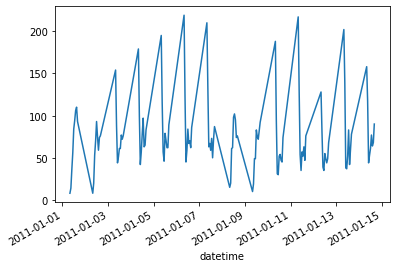

In [31]:
df.loc['2011-01-01':'2011-01-14']['count'].between_time('08:00:00', '16:00:00').plot()

In [ ]:
df.index[0]

In [ ]:
df.index[0].is_year_start

## 2) Timedelta objects

Pandas has inbuilt Timedelta objects
* An array of Timedelta objects is a TimedeltaIndex
* The datatype of a TimeStamp object is timedelta64
* There are three methods of creating Timedeltas or a TimedeltaIndex:
    - 1) `pd.to_timedelta()`
    - 2) `pd.timedelta_range()`
    - 3) Subtract two pd.Timestamp objects

In [ ]:
date_range[0]

In [ ]:
delta = date_range[1] - date_range[0]
delta

In [ ]:
delta.seconds

In [ ]:
df.index.month

In [ ]:
df.index.max() - df.index.min()

In [ ]:
df.index = df.index.tz_localize('UTC')

In [ ]:
df.index

In [ ]:
df.index = df.index.tz_convert('US/Eastern')

In [ ]:
df.index

In [ ]:
df.index = df.index.tz_convert('Europe/Berlin')

In [ ]:
df.index

In [ ]:
df.iloc[4000:5000]

In [ ]:
period_range = pd.period_range('2019 10 01', '2019 11 01')

In [ ]:
period_range

## Other concepts: `resample()`, `shift()` and `rolling()`

In [ ]:
df['2011-01':'2011-02']

In [ ]:
df.shape

In [ ]:
downsampled = df.resample('D').mean()
downsampled.head()

In [ ]:
downsampled.shape

In [ ]:
upsampled = downsampled.resample('H').interpolate()
upsampled.head()

In [ ]:
upsampled.shape

In [ ]:
df['count']['2011-01'].plot(figsize=(15, 8))
df['a'] = df['count']['2011-01'].rolling(24).mean()
df['a'].plot()


In [ ]:
df.head(25)

In [ ]:
df.shift(1).head()

In [ ]:
df.shift(-1).head()

In [ ]:
df.shift(-1).tail()